# TELECOM CHURN DATA

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
dfchurn=pd.read_csv("churn.csv")
print(dfchurn.shape)
dfchurn.head()

(3333, 21)


,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
dfchurn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Cleaning

In [8]:
dfchurn["Int'l Plan"] = dfchurn["Int'l Plan"]=='yes'
dfchurn["VMail Plan"] = dfchurn["VMail Plan"]=='yes'

In [9]:
colswewant_cont=[ u'Account Length', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls']
colswewant_cat=[u"Int'l Plan", u'VMail Plan']

In [10]:
churn = np.where(dfchurn['Churn?'] == 'True.',1,0)
churn.mean()
##highly imbalanced data. only 14% positives

0.14491449144914492

## Imbalaced Data
Since the data is highly imbalanced. Accuracy is not a good metric. Infact a dummy classifier which always classifies as most frequent class will have an accuracy of ~86%
Thinking of the problem from a buisiness perspective, say we want to prevent people from churning by offering 100\\$ gift cards to people we predict will churn.
Assuming a customer has a lifetime value of 2000\\$.
Let's also assume we would successfully convert around 50% of people from churning by offering gift cards.

In [11]:
offer_cost=100
lifetime_value=1000

## cost matrix

In [12]:
conv=0.5
tnc = 0 #we rightly predict they do not churn and dont spend a buck.
fpc = offer_cost #we wrongly predict they churn and lose 100 dollars
fnc = lifetime_value # we wrongly predict they do not churn and lose 1000 dollars
tpc = conv*offer_cost + (1. - conv)*(lifetime_value) #we rightly predict they would churn but successfully preven 50% from churning

In [13]:
cost=np.array([[tnc,fpc],[fnc, tpc]])
cost

array([[   0.,  100.],
       [1000.,  550.]])

### The expected (avg) cost per person would be:

\begin{eqnarray}
Cost &=& c(1P,1A) \times p(1P,1A) + c(1P,0A) \times p(1P,0A) + c(0P,1A) \times p(0P,1A) + c(0P,0A) \times p(0P,0A) \\
&=& \frac{TP \times c(1P,1A) + FP \times c(1P,0A) + FN \times c(0P,1A) + TN \times c(0P,0A)}{N}
\end{eqnarray}
or

$\frac{\sum (CostMarix*ConfusionMatrix)}{N}$

In [14]:
def average_cost(y, ypred, cost):
    c=confusion_matrix(y,ypred)
    cost=np.sum(c*cost)/np.sum(c)
    return cost

In [15]:
from sklearn.model_selection import train_test_split

Y=dfchurn['Churn?']=='True.'
X=dfchurn[colswewant_cat+colswewant_cont]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)


### Dummy Classifiers: Noone churns & Everyone Churns

In [16]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
nochurns=np.zeros(Y_test.shape[0],dtype='int')
allchurns=np.ones(Y_test.shape[0],dtype='int')


#### Average Cost When we do not send gift cards to anyone

In [17]:
print("ACCURACY: ",accuracy_score(Y_test,nochurns))
print("*****************")
print(confusion_matrix(Y_test,nochurns))
print("Avg Cost: ",average_cost(Y_test,nochurns,cost))

ACCURACY:  0.8621103117505995
*****************
[[719   0]
 [115   0]]
Avg Cost:  137.88968824940048


#### Average Cost when we send gift cards to everyone

In [18]:
print("ACCURACY: ",accuracy_score(Y_test,allchurns))
print("*****************")
print(confusion_matrix(Y_test,allchurns))
print("Avg Cost: ",average_cost(Y_test,allchurns,cost))

ACCURACY:  0.13788968824940048
*****************
[[  0 719]
 [  0 115]]
Avg Cost:  162.0503597122302


##### Hence we need to beat atleast the avg cost of 137 where we dont send gift cards to anyone

# SVM

In [61]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
svmxtrain=mm.fit_transform(X_train)
svmxtest=mm.transform(X_test)
from sklearn.svm import SVC
sv=SVC()
gs=GridSearchCV(sv,param_grid={'C':[0.01,0.1,1,10,100],'gamma':[0.01,0.1,1,10]})
gs.fit(svmxtrain,Y_train)

/home/himank/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [67]:
print('ACCURACY: ',gs.score(svmxtest,Y_test))
print("COST: ",average_cost(Y_test,gs.predict(svmxtest),cost))

ACCURACY:  0.935251798561151
COST:  99.52038369304556


# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
clfgnb = GaussianNB()
clfgnb.fit(X_train,Y_train)
gnbpred=clfgnb.predict(X_test)

In [69]:
print(clfgnb.score(X_test,Y_test))
print(confusion_matrix(Y_test,gnbpred))
print("Cost: ",average_cost(Y_test,gnbpred,cost))

0.8621103117505995
[[652  67]
 [ 48  67]]
Cost:  109.77218225419664


# RandomForest

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1,random_state=0)
params={'max_depth':[None,10,20,50],'min_samples_split':[2,5,8],'n_estimators':[100,200,400]}
gs=GridSearchCV(rf,param_grid=params,cv=5)


In [23]:
gs.fit(X_train,Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [131]:
gs.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

In [27]:
bestrf=gs.best_estimator_
bestrf.fit(X_train,Y_train)
predrf=bestrf.predict(X_test)
print(accuracy_score(Y_test,predrf))
print(confusion_matrix(Y_test,predrf))
average_cost(Y_test,predrf,cost)


0.9544364508393285
[[706  13]
 [ 25  90]]


90.88729016786571

### 90 dollars per person.


# ROC

<IPython.core.display.Javascript object>


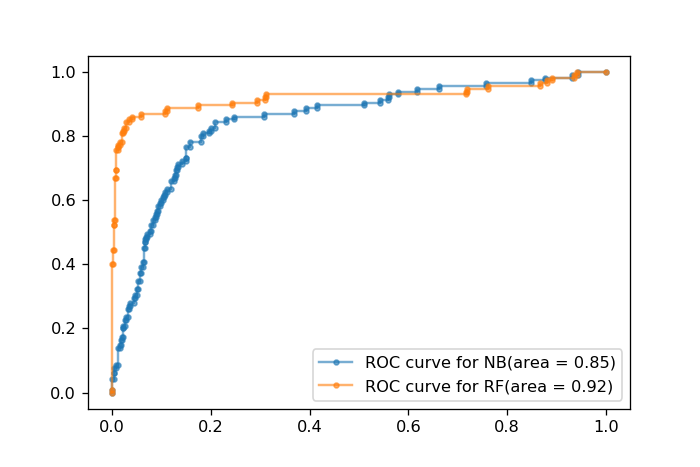

In [28]:
%matplotlib notebook
from sklearn.metrics import roc_curve, auc
plt.figure()

#Naive Bayes
fpr,tpr,th=roc_curve(Y_test,clfgnb.predict_proba(X_test)[:,1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, '.-', alpha=0.6, label='ROC curve for NB(area = %0.2f)' % (roc_auc))
plt.yticks(np.arange(0,1.2,0.2))

#Randomforest
fpr,tpr,th=roc_curve(Y_test,bestrf.predict_proba(X_test)[:,1])
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, '.-', alpha=0.6, label='ROC curve for RF(area = %0.2f)' % (roc_auc))

plt.legend()

In [187]:
def percentage(tpr, fpr, priorp, priorn):
    perc = tpr*priorp + fpr*priorn
    return perc
def av_cost2(tpr, fpr, cost, priorp, priorn):
    profit = priorp*(cost[1][1]*tpr+cost[1][0]*(1.-tpr))+priorn*(cost[0][0]*(1.-fpr) +cost[0][1]*fpr)
    return profit
def plot_cost(name, clf, ytest, xtest, cost, ax=None, threshold=False, labe=200, proba=True):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    priorp=np.mean(ytest)
    priorn=1. - priorp
    ben=[]
    percs=[]
    for i,t in enumerate(thresholds):
        perc=percentage(tpr[i], fpr[i], priorp, priorn)
        ev = av_cost2(tpr[i], fpr[i], cost, priorp, priorn)
        ben.append(ev)
        percs.append(perc*100)
    ax.plot(percs, ben, '-', alpha=0.3, markersize=5, label='cost curve for %s' % name)
    if threshold:
        label_kwargs = {}
        label_kwargs['bbox'] = dict(
        boxstyle='round,pad=0.3', alpha=0.2,
        )
        for k in range(0, fpr.shape[0],labe):
            #from https://gist.github.com/podshumok/c1d1c9394335d86255b8
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (percs[k], ben[k]), **label_kwargs)
    ax.legend(loc="lower right")
    return ax

<IPython.core.display.Javascript object>


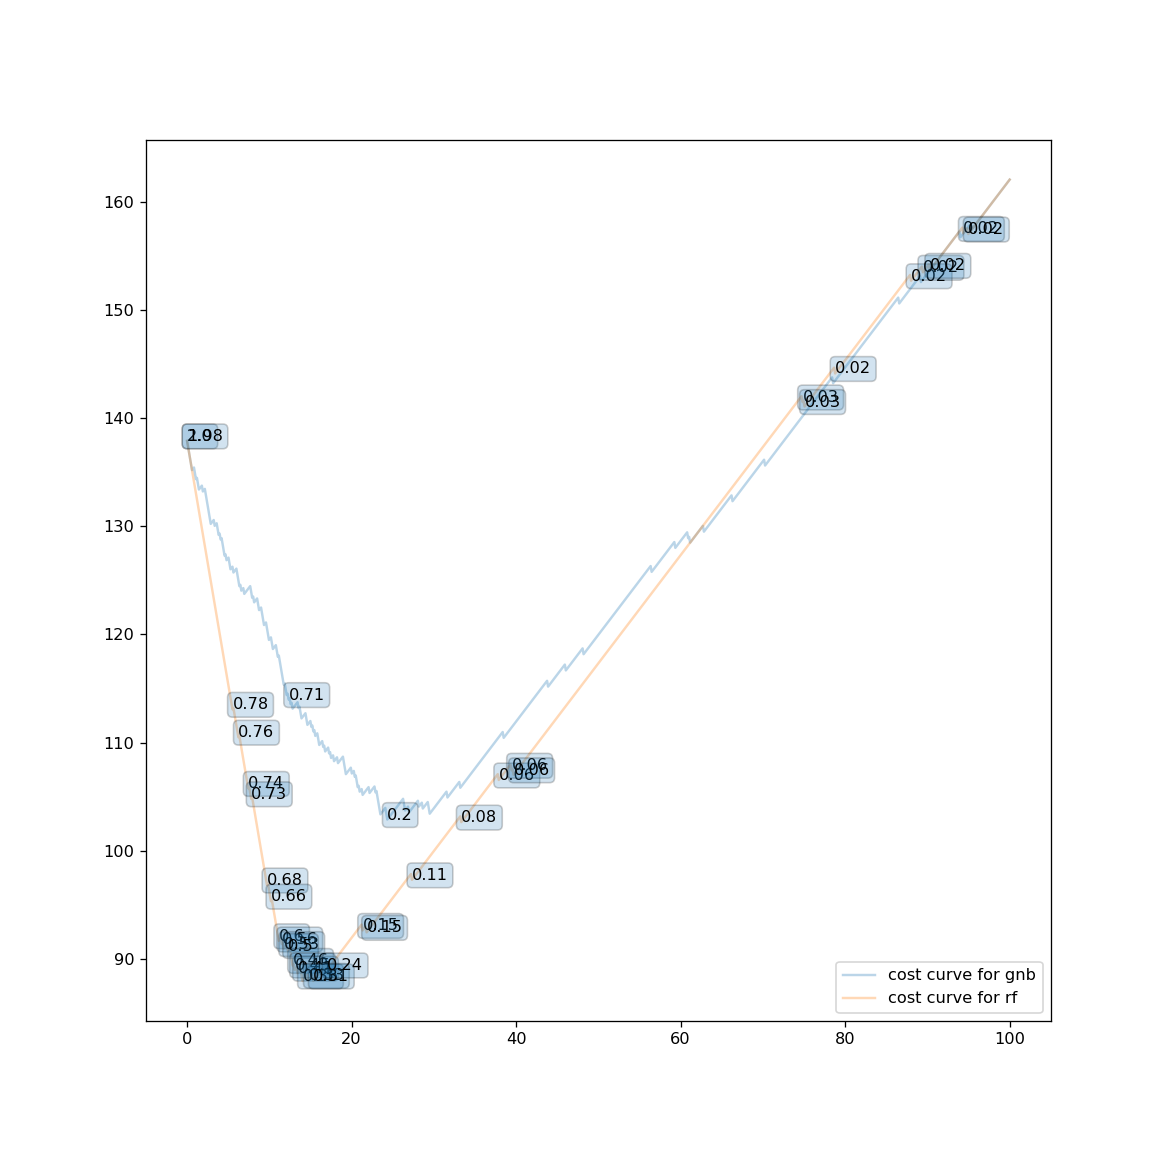

In [193]:
plt.figure(figsize=(10,10))
ax = plot_cost("gnb",clfgnb, Y_test, X_test, cost, threshold=True, labe=50);
plot_cost("rf",bestrf, Y_test, X_test, cost, ax, threshold=True, labe=2);